# Preparing the Data for Structure Learning


In [25]:
import pandas as pd
import warnings
from causalnex.structure import StructureModel
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE


data = pd.read_csv('lightsail_dataset.csv', delimiter=',')
data = data.dropna()
data.head(5)

,time,atmelPwr_curr,atmelPwr_volt,threeV_plTmp,threeV_plPwr_volt,threeV_plPwr_curr,fiveV_plPwr_volt,fiveV_plPwr_curr,daughter_aTmp,daughter_aPwr_volt,...,deploy_armed,pic_on,pic_busy,pic_status,motor_pos,motor_limit,wheel_speed,ss_votes_lt3_wrap,ss_votes_eq3_wrap,ss_votes_gt3_wrap
1902,1.563051e+09,2560.0,266240.0,17060.0,215040.0,2048.0,331776.0,17408.0,17060.0,0.0,...,0.0,0.0,0.0,0.0,0.0,135563.0,0.0,0.0,0.0,0.0
1903,1.563051e+09,1504.0,264192.0,17028.0,215040.0,1536.0,331776.0,17408.0,17060.0,0.0,...,0.0,0.0,0.0,0.0,0.0,135563.0,0.0,0.0,0.0,0.0
1904,1.563051e+09,1632.0,264192.0,17060.0,215040.0,2048.0,331776.0,16896.0,17060.0,0.0,...,0.0,0.0,0.0,0.0,0.0,135563.0,0.0,0.0,0.0,0.0
1905,1.563051e+09,2528.0,264192.0,17060.0,215040.0,1536.0,331776.0,17408.0,17060.0,0.0,...,0.0,0.0,0.0,0.0,0.0,135563.0,0.0,0.0,0.0,0.0
1906,1.563051e+09,1568.0,264192.0,17060.0,215040.0,2560.0,331776.0,16384.0,17092.0,0.0,...,0.0,0.0,0.0,0.0,0.0,135563.0,0.0,0.0,0.0,0.0


Looking at the data, we can see that features consist of numeric and non-numeric columns. We can drop sensitive features such as sex that we do not want to include in our model.

In [2]:

#drop_col = ['school','sex','age','Mjob', 'Fjob','reason','guardian']
#data = data.drop(columns=drop_col)
#data.head(5)

Next, we want to make our data numeric, since this is what the NOTEARS expects. We can do this by label encoding non-numeric variables.

In [ ]:
#LightSail2 dataset does not contains non-numeric values

### We can now apply the NOTEARS algorithm to learn the structure.

In [40]:

from causalnex.structure.notears import from_pandas

sm = from_pandas( data, max_iter=900000)


C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:391: RuntimeWarning: overflow encountered in double_scalars
  return loss + 0.5 * rho * h * h + alpha * h
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: overflow encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


In [34]:
sm2 = sm.copy()

and visualise the learned StructureModel using the plot function.

In [27]:
graph_attributes = {
    "splines": "spline",  # I use splies so that we have no overlap
    "ordering": "out",
    "ratio": "fill",  # This is necessary to control the size of the image
    "size": "16,9!",  # Set the size of the final image. (this is a typical presentation size)
    "label": "",
    "fontcolor": "#FFFFFFD9",
    "fontname": "Helvetica",
    "fontsize": 100,
    "labeljust": "l",
    "labelloc": "t",
    "pad": "1,1",
    "dpi": 200,
    "nodesep": 0.8,
    "ranksep": ".5 equally",
}

node_attributes = {
    node: {
        "fontsize": 18,
        "labelloc": "t",
        "fontcolor": "red"
    }
    for node in sm.nodes
}



# Customising edges
edge_attributes = {
    (u, v): {
        "color": "white"
    }
    for u, v, w in sm.edges(data="weight")
}


In [17]:


viz = plot_structure(
    sm,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    prog='fdp',
)
Image(viz.draw(format='png'))

C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'time', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


KeyboardInterrupt: 

The reason why we have a fully connected graph here is we haven’t applied thresholding to the weaker edges. Thresholding can be applied either by specifying the value for the parameter w_threshold in from_pandas, or we can remove the edges by calling the structure model function, remove_edges_below_threshold.

C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'time', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'time', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


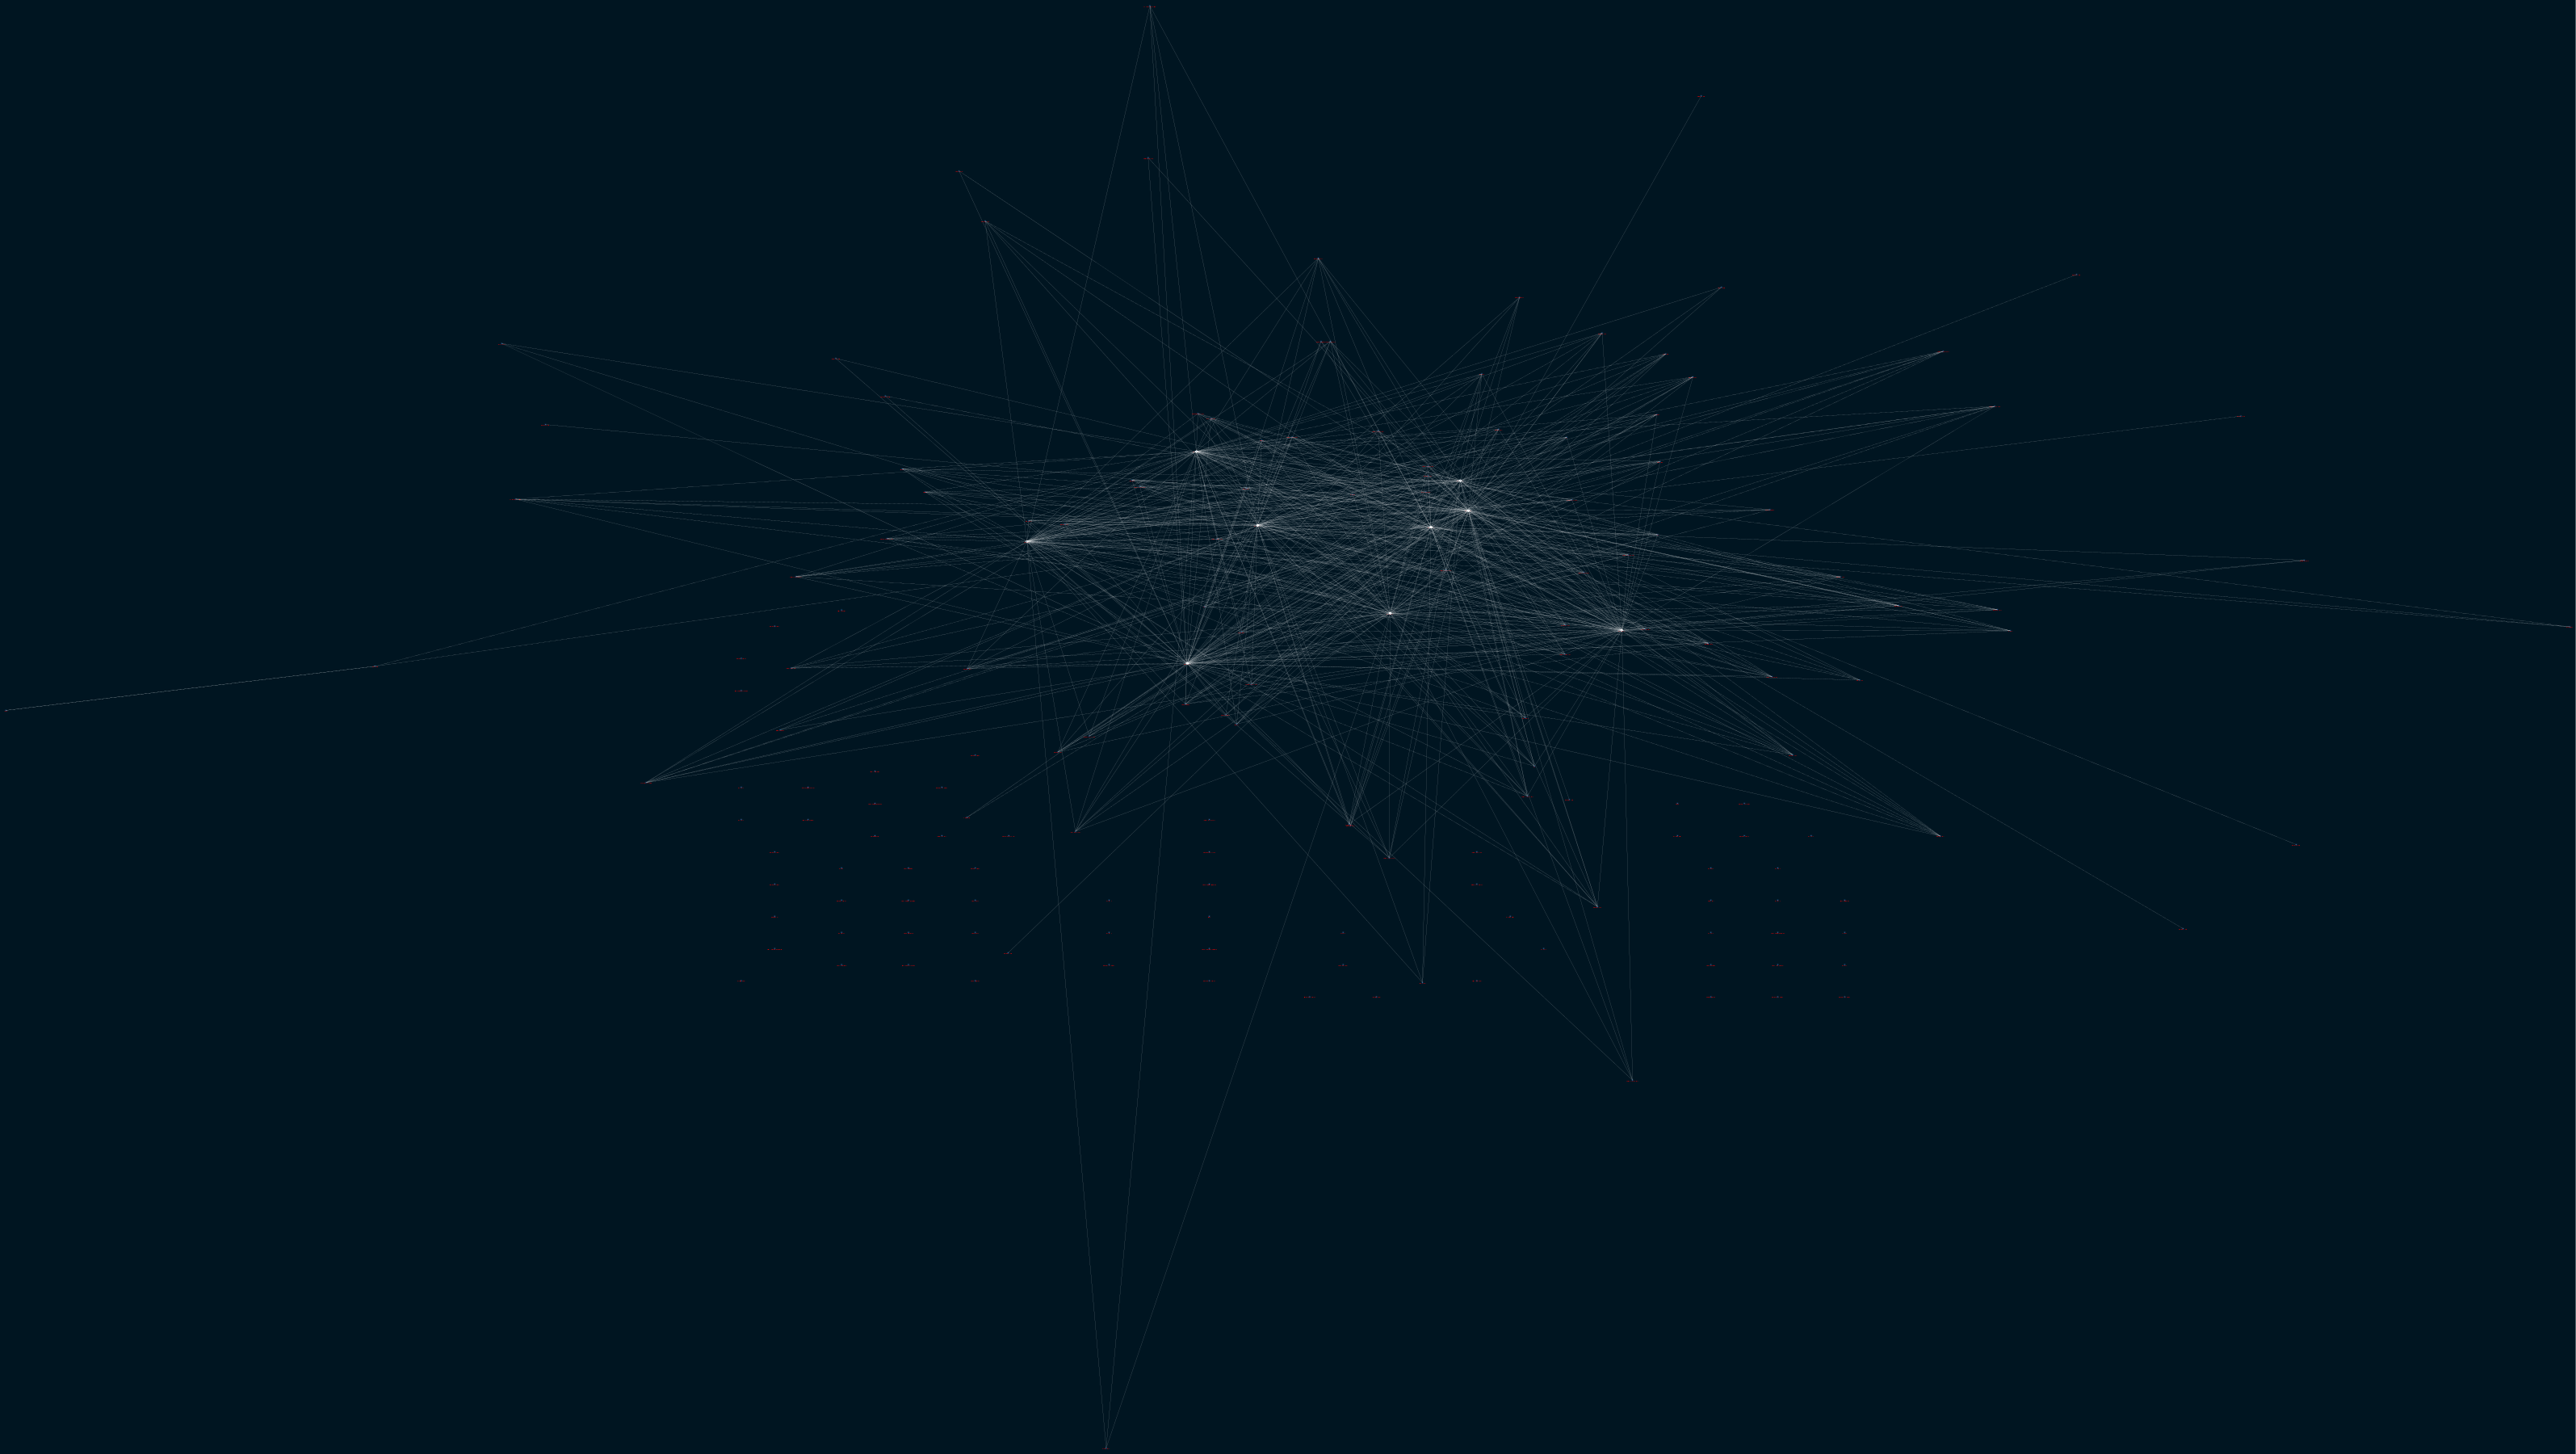

In [35]:
sm2.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm2,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    prog='fdp',
)
Image(viz.draw(format='png'))

C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'time', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'time', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


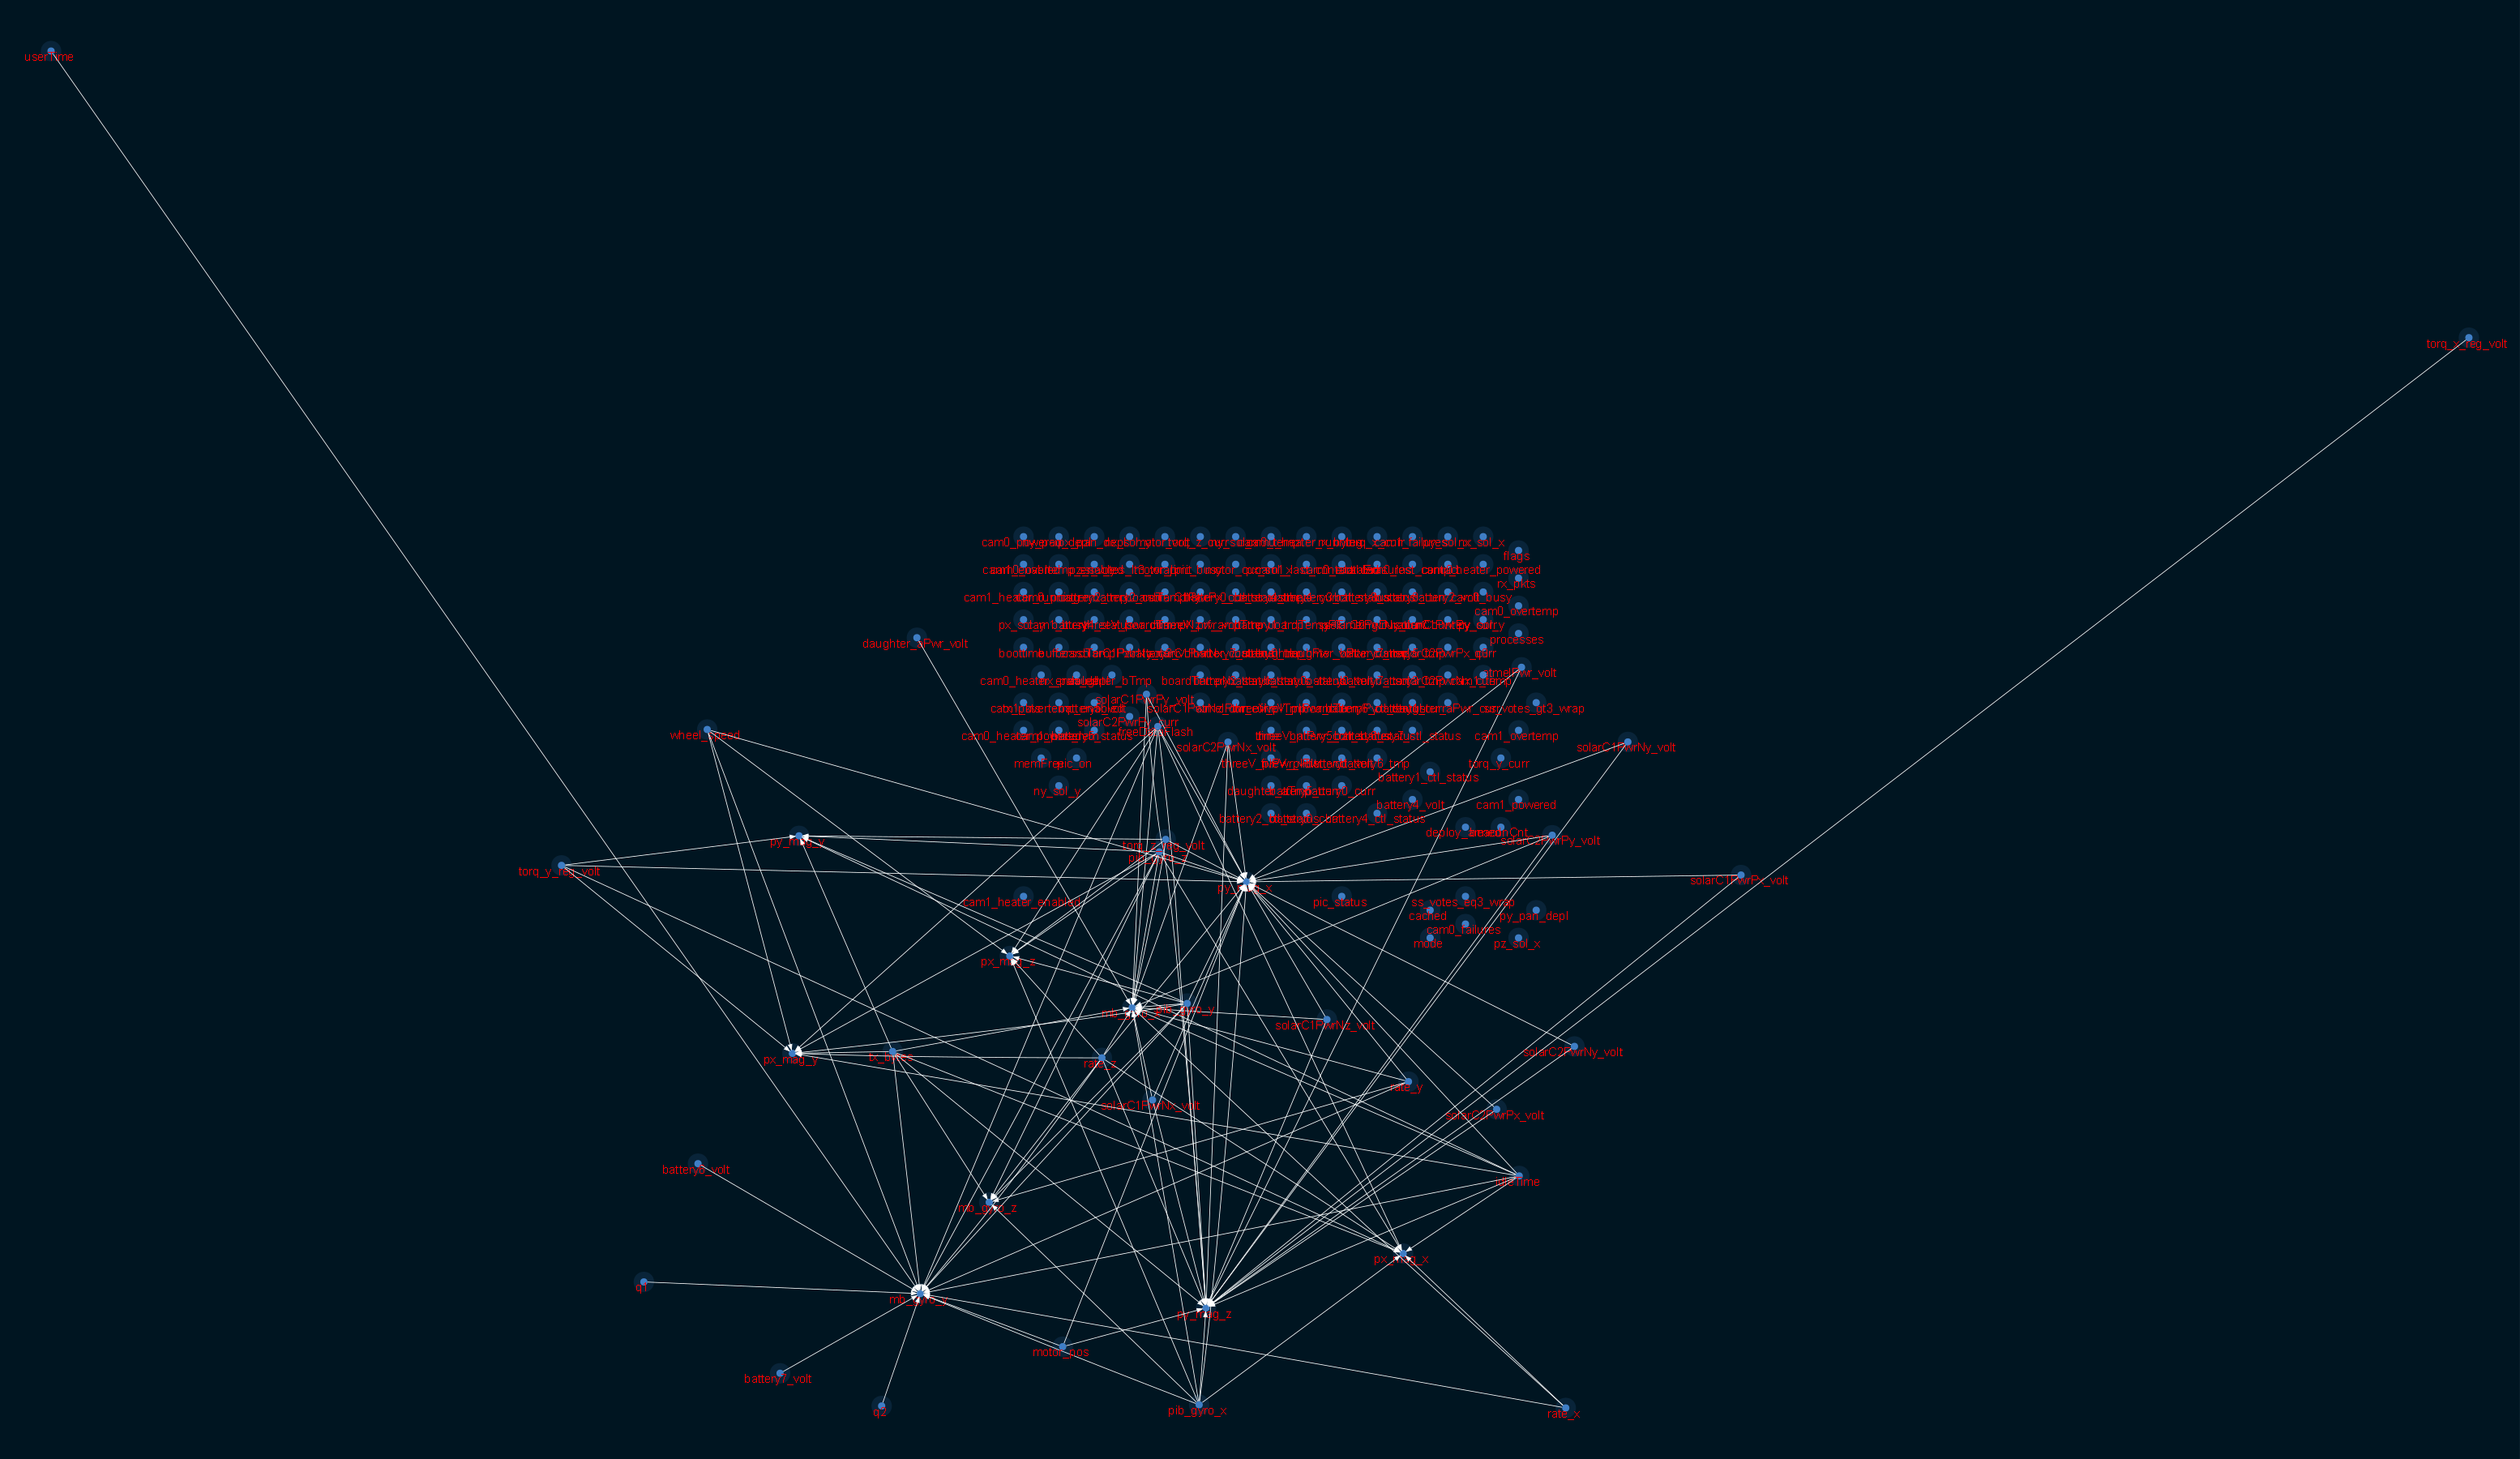

In [41]:
sm.remove_edges_below_threshold(30)
viz = plot_structure(
    sm,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    prog='fdp',
)
Image(viz.draw(format='png'))

In [30]:
for u, v, w in sm.edges(data="weight"):
    print(u, v, w)

time boottime 0.9992708754447551
atmelPwr_volt mb_gyro_x 19.97699755550383
atmelPwr_volt mb_gyro_y -25.828965448408383
atmelPwr_volt mb_gyro_z 15.456090809991892
atmelPwr_volt px_mag_x -19.171845677637105
atmelPwr_volt px_mag_y -19.61210780977284
atmelPwr_volt px_mag_z -3.330447261132609
atmelPwr_volt py_mag_x 49.710042515410194
atmelPwr_volt py_mag_y 7.134549276715979
atmelPwr_volt py_mag_z -35.69933464627816
threeV_plTmp mb_gyro_x 3.8250543626174296
threeV_plTmp mb_gyro_z 3.8305828272495646
threeV_plPwr_volt mb_gyro_x 12.005817180280575
threeV_plPwr_volt mb_gyro_y 23.229511453841468
threeV_plPwr_volt mb_gyro_z 0.8818037776389467
threeV_plPwr_volt px_mag_x 6.286373854619483
threeV_plPwr_volt px_mag_y -2.8202929902568363
threeV_plPwr_volt px_mag_z 4.561924365237978
threeV_plPwr_volt py_mag_x 10.06002244877689
threeV_plPwr_volt py_mag_y 5.366103086933176
fiveV_plPwr_volt mb_gyro_y -8.357005646376365
fiveV_plPwr_volt mb_gyro_z 2.333113672532476
fiveV_plPwr_volt px_mag_x -2.82902594167700

In this structure, we can see that there are some relationships that appear intuitively correct:

Pstatus affects famrel - if parents live apart, the quality of family relationship may be poor as a result.

internet affects absences - The presence of internet at home may cause student to skip class.

studytime affects G1 - longer studytime should have a positive impact on a student’s result.

However, there are some relationships that are certainly incorrect:

higher affects Medu (Mother’s education) - this relationship does not make sense as students who wants to pursue higher education does not affect mother’s education. It could be the other way round.

To avoid these erroneous relationships, we can re-run structure learning with some added constraints:

In [ ]:
#sm = from_pandas(struct_data, tabu_edges=[("higher", "Medu")], w_threshold=0.8)

In [ ]:
viz = plot_structure(
    sm,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    prog='fdp',
)
Image(viz.draw(format='png'))

### Modifying the Structure

To correct erroneous relationships, we can incorporate domain knowledge into the model after structure learning. We can modify the structure model through adding and deleting the edges. For example, we can add and remove edges as:

In [ ]:

#sm.add_edge("failures", "G1")
#sm.remove_edge("Pstatus", "G1")
#sm.remove_edge("address", "G1")

We can now visualise our updated structure to confirm it looks reasonable.

In [ ]:
viz = plot_structure(
    sm,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    prog='fdp',
)
Image(viz.draw(format='png'))

We can see there are two separate subgraphs here in the visualisation plot: Dalc->Walc and the other big subgraph. We can retrieve the largest subgraph easily by calling the StructureModel function get_largest_subgraph().

C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'px_mag_x', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


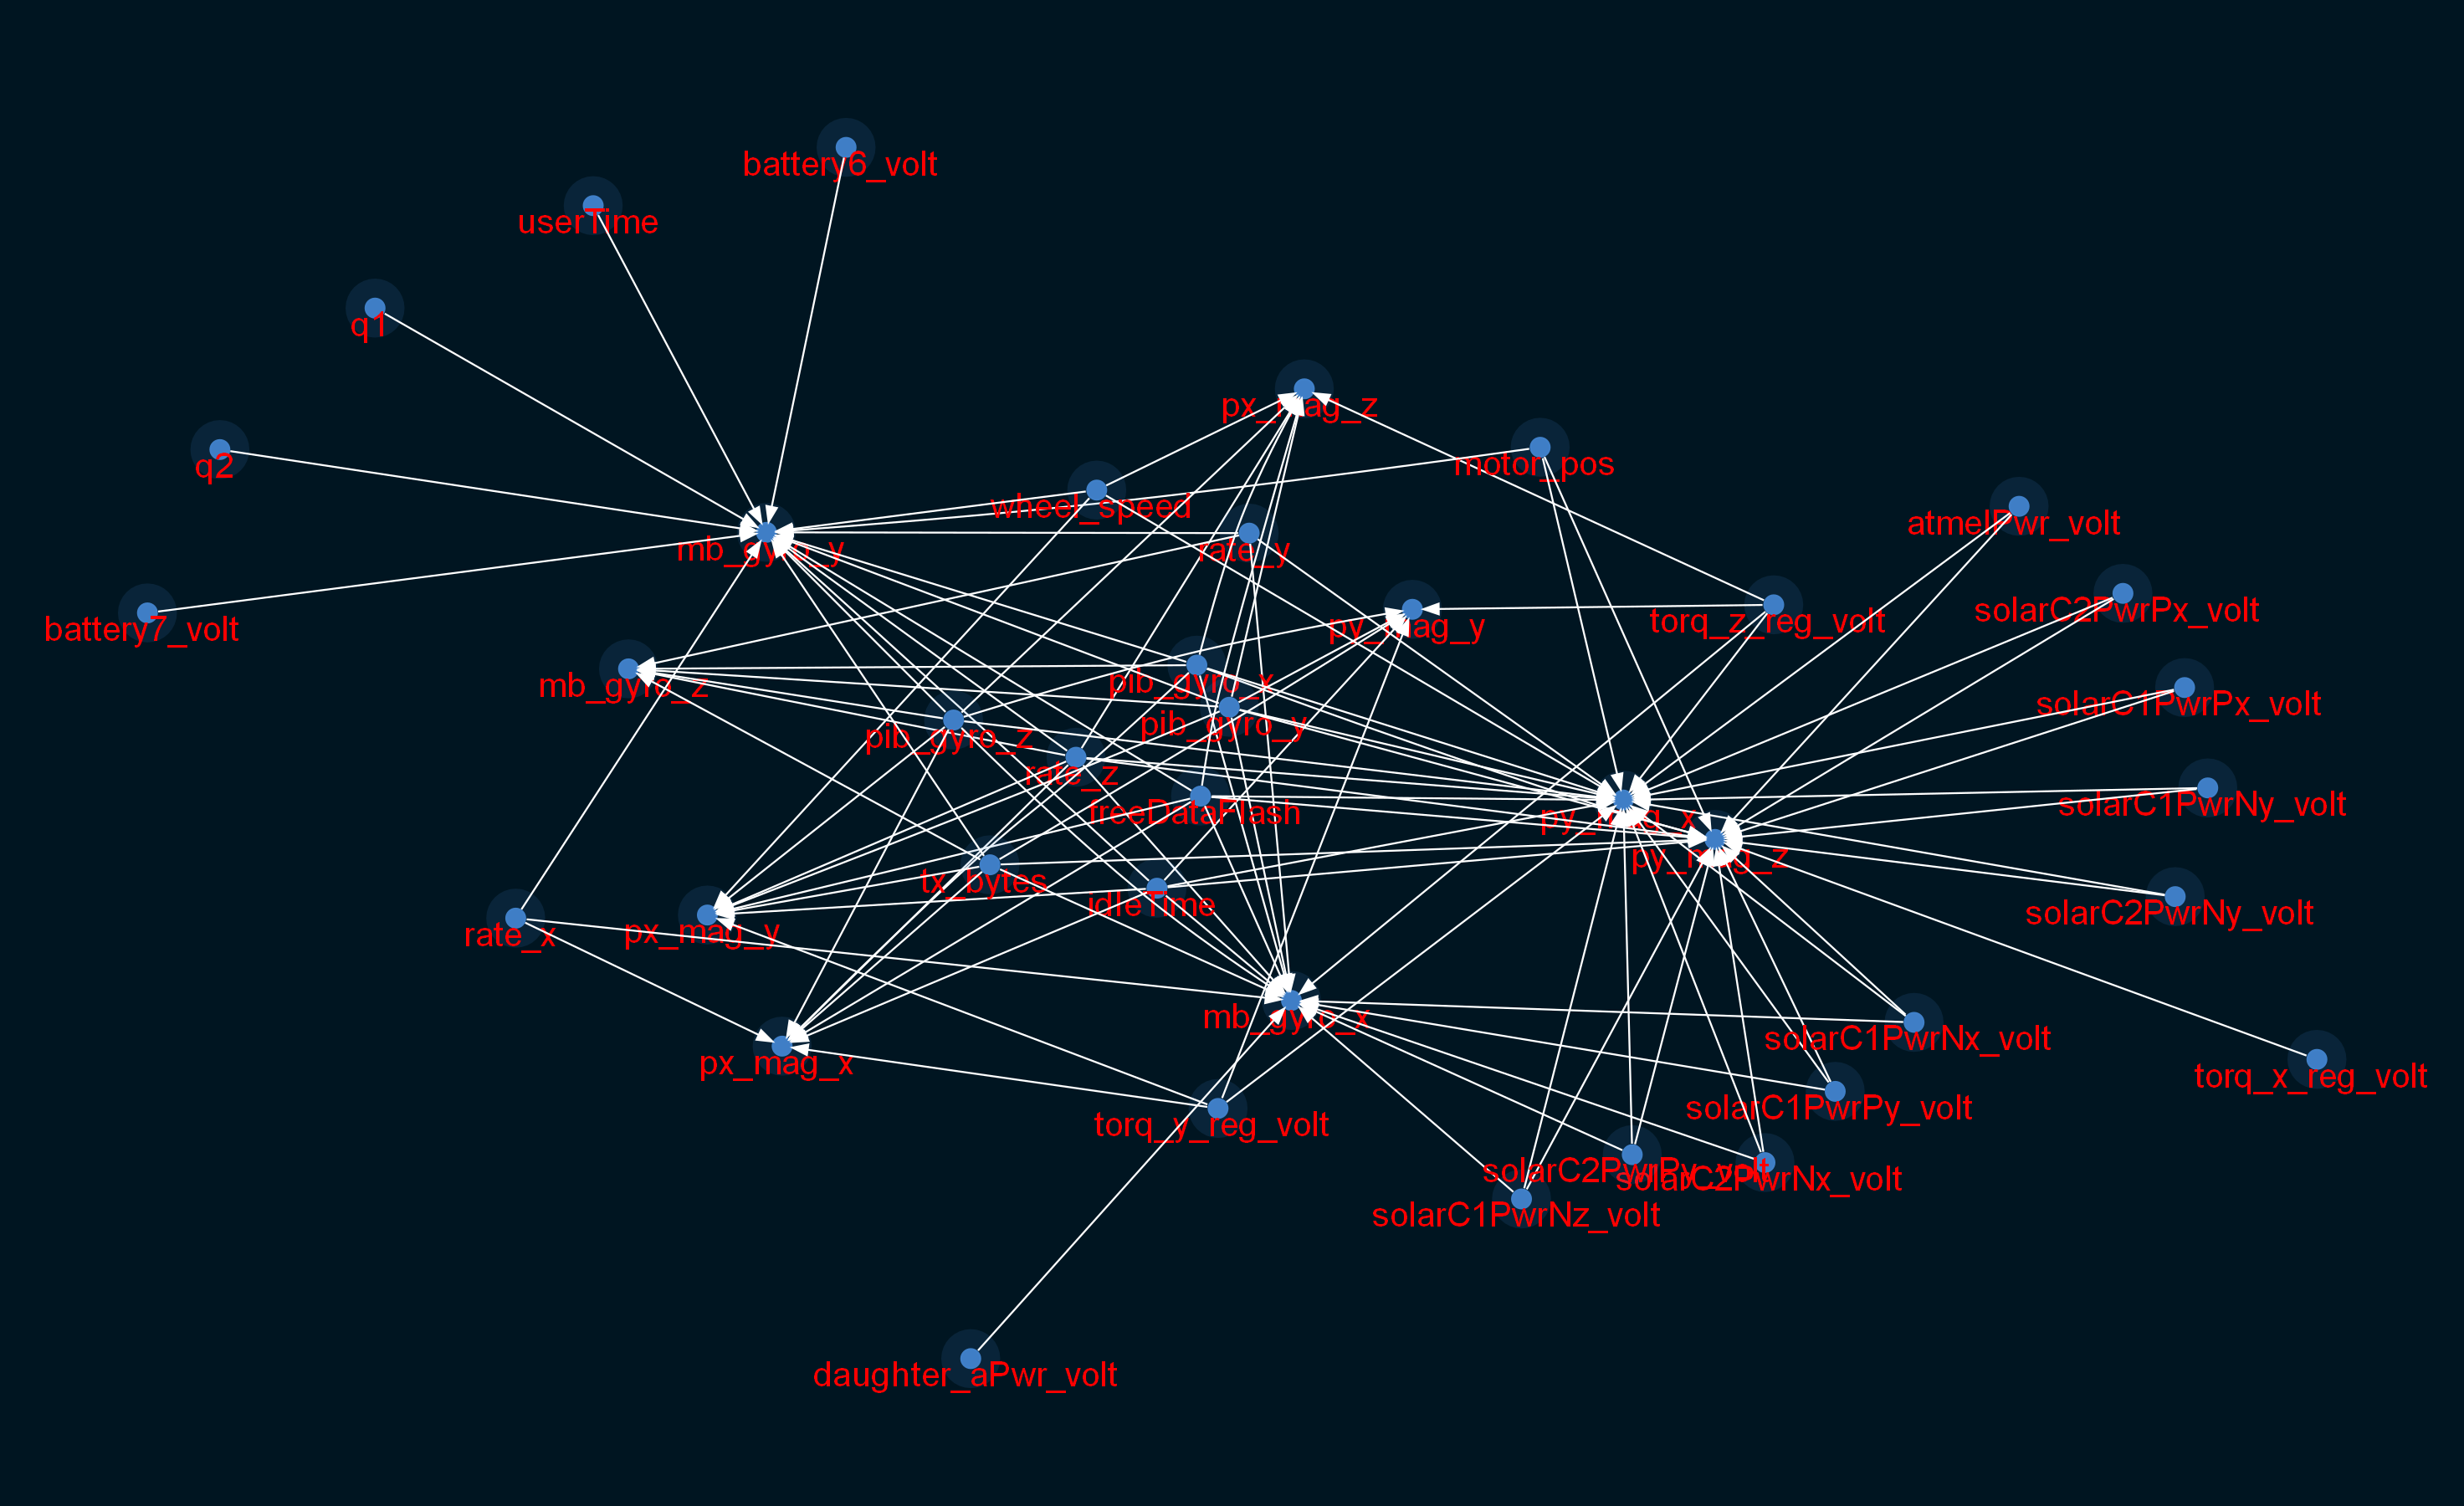

In [43]:

sm3 = sm.get_largest_subgraph()
viz = plot_structure(
    sm3,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
)
Image(viz.draw(format='png'))

### Exporting the Structure

It is worth noting that StructureModel extends networkx.DiGraph (see here). We can therefore use networkx’s read/write methods to import/export our StructureModel. For example, we can export to a graphviz .dot file using write_dot function:

In [44]:
import networkx as nx

nx.drawing.nx_pydot.write_dot(sm3, 'graph.dot')

ModuleNotFoundError: No module named 'pydot'

To export to other formats, please refer to networkx’s documentation.

# Fitting the Conditional Distribution of the Bayesian Network

After deciding on how the final structure model should look, we can instantiate a BayesianNetwork.

In [45]:

from causalnex.network import BayesianNetwork

bn = BayesianNetwork(sm3)

C:\ProgramData\Anaconda3\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


We are now ready to move on to learning the conditional probability distribution of different features in the BayesianNetwork.

### Preparing the Discretised Data

Bayesian Networks in CausalNex support only discrete distributions. Any continuous features, or features with a large number of categories, should be discretised prior to fitting the Bayesian Network. Models containing variables with many possible values will typically be badly fit, and exhibit poor performance.

For example, consider P(G2 | G1), where G1 and G2 have possible values 0 to 20. The discrete conditional probability distribution is therefore specified using 21x21 (441) possible combinations - most of which we will be unlikely to observe.

CausalNex provides a few helper methods to make discretisation easier. Let’s start by reducing the number of categories in some of the categorical features by combining similar values. We will make numeric features categorical by discretisation, and then give the buckets meaningful labels.

## Cardinality of Categorical Features

To reduce the cardinality of categorical features we can define a map {old_value: new_value}, and use this to update the feature. For example, in the studytime feature, we make the studytime which is more than 2 (2 means 2 to 5 hours here, see https://archive.ics.uci.edu/ml/datasets/Student+Performance) into long-studytime, and the rest into short-studytime.

In [46]:
discretised_data = data.copy()

data_vals = {col: data[col].unique() for col in data.columns}

failures_map = {v: 'no-failure' if v == [0]
                else 'have-failure' for v in data_vals['failures']}
studytime_map = {v: 'short-studytime' if v in [1,2]
                 else 'long-studytime' for v in data_vals['studytime']}

KeyError: 'failures'

Once we have defined our maps {old_value: new_value} we can update each feature, applying the mapping transformation.

In [ ]:
discretised_data["failures"] = discretised_data["failures"].map(failures_map)
discretised_data["studytime"] = discretised_data["studytime"].map(studytime_map)

## Discretising Numeric Features
To make numeric features categorical, they must first be discretised. CausalNex provides a helper class causalnex.discretiser.Discretiser, which supports several discretisation methods. For our data the fixed method will be applied, providing static values that define the bucket boundaries. For example, absences will be discretised into the buckets < 1, 1 to 9, and >=10. Each bucket will be labelled as an integer from zero.

In [ ]:
from causalnex.discretiser import Discretiser

discretised_data["absences"] = Discretiser(method="fixed",
                          numeric_split_points=[1, 10]).transform(discretised_data["absences"].values)
discretised_data["G1"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["G1"].values)
discretised_data["G2"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["G2"].values)
discretised_data["G3"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["G3"].values)

## Create Labels for Numeric Features
To make the discretised categories more readable, we can map the category labels onto something more meaningful in the same way that we mapped category feature values.

In [ ]:
absences_map = {0: "No-absence", 1: "Low-absence", 2: "High-absence"}

G1_map = {0: "Fail", 1: "Pass"}
G2_map = {0: "Fail", 1: "Pass"}
G3_map = {0: "Fail", 1: "Pass"}

discretised_data["absences"] = discretised_data["absences"].map(absences_map)
discretised_data["G1"] = discretised_data["G1"].map(G1_map)
discretised_data["G2"] = discretised_data["G2"].map(G2_map)
discretised_data["G3"] = discretised_data["G3"].map(G3_map)